# Priamy prechod

Spravime si jednoduchy priamy prechod hard-coded sietou.


Nas priklad bude pozostavat z nasledovnych krokov:

1. Priprava datasetu
2. Inicializacia parametrov siete
3. Priamy prechod
4. Spocitanie hodnoty cost funkcie J


In [1]:
import numpy as np

from utils import dataset_Circles, draw_DecisionBoundary

# Inicializujeme random seed, aby sa nam opakovali rovnake vysledky z randomu
np.random.seed(10)


## 1. Priprava datasetu

Budeme pracovat s Circles datasetom, a teraz nam bude stacit 10 vzoriek.


In [2]:

# Pocet vzoriek v trenovacej mnozine
m = 10

# 1. Pripravime si dataset
X, Y = dataset_Circles(m)

# Vypiseme parametre nasho nadasetu
nx, m = X.shape
ny, _ = Y.shape

print('Number of samples in the dataset: ', m)
print('Number of input features:         ', nx)
print('Number of output features:        ', ny)


Number of samples in the dataset:  10
Number of input features:          2
Number of output features:         1


## 2. Inicializacia parametrov siete

Budeme pouzivat dvojvrstvovu siet, ktora bude obsahovat 3 neurony na skrytej vrstve. Pre obidve vrstvy nainicializujeme maticu vah a biasu. Vahy budeme inicializovat nahodne, Bias hodnotou 0.

In [3]:
# Pocet neuronov skrytej vrstvy
nHidden = 3

# 2. Inicializacia matic pre skrytu vrstvu W1, b1 a potom aj pre poslednu vrstvu W2, b2
W1 = np.random.randn(nHidden, nx)                  # Normal distribution
b1 = np.zeros(shape=(nHidden, 1), dtype=float)

W2 = np.random.randn(ny, nHidden)                  # Normal distribution
b2 = np.zeros(shape=(ny, 1), dtype=float)

print('W1: \n', W1, '\n')
print('b1: \n', b1, '\n')
print('W2: \n', W2, '\n')
print('b2: \n', b2, '\n')


W1: 
 [[ 1.30847308  0.19501328]
 [ 0.40020999 -0.33763234]
 [ 1.25647226 -0.7319695 ]] 

b1: 
 [[0.]
 [0.]
 [0.]] 

W2: 
 [[ 0.66023155 -0.35087189 -0.93943336]] 

b2: 
 [[0.]] 



## 3. Priamy prechod

V nasom priklade budeme pouzivat ReLU aktivacnu funkciu pre skrytu vrstvu, a Sigmoid aktivacnu funkciu pre poslednu vrstvu.


In [4]:
def relu(z):
    return np.maximum(z, 0)                 # Element-wise !

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))         # Element-wise !


Teraz mozeme napisat funkciu, ktora spocita priamy prechod  sietou


In [5]:
def forward(X):
    # Vstup je aktivacia nultej vrstvy
    A0 = X

    # Linearna funkcia a aktivacia pre prvu vrstvu
    Z1 = np.matmul(W1, A0) + b1
    A1 = relu(Z1)

    # Linearna funkcia a aktivacia pre druhu vrstvu
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A2


In [6]:
# Vyskusame spocitat priamy prechod nasou trenovacou mnozinou
YHat = forward(X)
print('Ground truth Y: \n', Y, '\n')
print('Prediction YHat: \n', YHat, '\n')



Ground truth Y: 
 [[0. 1. 1. 0. 0. 0. 1. 0. 1. 1.]] 

Prediction YHat: 
 [[0.52463932 0.5        0.25930161 0.44903745 0.51947084 0.5
  0.5        0.34814469 0.5        0.5       ]] 



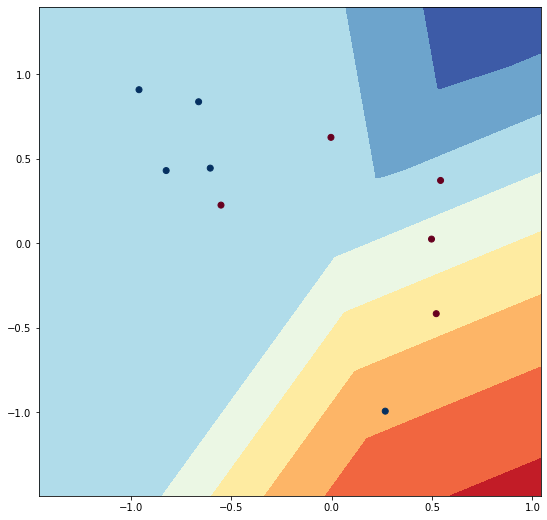

In [7]:
# Nakreslime decision boundary pre nasu funkciu
draw_DecisionBoundary(X, Y, forward)


## 4. Spocitanie cost funkcie J

Ako posledny krok ideme spocitat hodnotu cost funkcie J. Pouzijeme nato stratovu funkciu Logistic Loss.


In [8]:
def logistic_loss(yhat, y):
    # np.log = prirodzeny logaritmus so zakladom e
    return -(y*np.log(yhat) + (1-y)*np.log(1-yhat))    


In [9]:
def cost(yhat, y):
    # Zisime pocet trenovacich vzoriek
    ny, m = y.shape
    J = (1.0 / m) * np.sum( logistic_loss(yhat, y) )

    # Ekvivalent  
    # J = np.mean(logistic_loss(yhat, y))
    return J


In [10]:
# Spocitame hodnotu cost funkcie
J = cost(YHat, Y)
print(J)

0.7316069190881959
